In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import seaborn as sb

In [2]:
df = pd.read_csv('./data.csv')

In [3]:
df.head()

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.0,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.0,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.0,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.0,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.0,1,1.29,1.0,1.0


In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 760
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                761 non-null    int64  
 1   reporting_start      761 non-null    object 
 2   reporting_end        761 non-null    object 
 3   campaign_id          761 non-null    object 
 4   fb_campaign_id       761 non-null    object 
 5   age                  761 non-null    object 
 6   gender               761 non-null    object 
 7   interest1            761 non-null    int64  
 8   interest2            761 non-null    int64  
 9   interest3            761 non-null    int64  
 10  impressions          761 non-null    float64
 11  clicks               761 non-null    int64  
 12  spent                761 non-null    float64
 13  total_conversion     761 non-null    float64
 14  approved_conversion  761 non-null    float64
dtypes: float64(4), int64(5), object(6)
memor

In [5]:
df.describe()

,ad_id,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
count,7.610000e+02,761.000000,761.000000,761.000000,7.610000e+02,761.000000,761.000000,761.000000,761.000000
mean,8.956389e+05,25.473062,28.977661,28.984231,1.031716e+05,15.340342,25.782181,2.161629,0.768725
std,1.670937e+05,15.508898,15.607548,15.604816,2.462644e+05,32.715738,57.622334,4.062201,1.656445
min,7.087460e+05,2.000000,3.000000,3.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.480860e+05,16.000000,19.000000,19.000000,3.149000e+03,0.000000,0.000000,1.000000,0.000000
50%,7.811750e+05,22.000000,26.000000,25.000000,1.219300e+04,3.000000,3.580000,1.000000,0.000000
75%,1.121184e+06,29.000000,33.000000,33.000000,8.597000e+04,14.000000,23.210000,2.000000,1.000000
max,1.121593e+06,66.000000,72.000000,72.000000,3.052003e+06,340.000000,639.949998,60.000000,21.000000


Setting Index of the dataset

In [6]:
Index=np.arange(1,762)
df.set_index(Index,inplace=True)

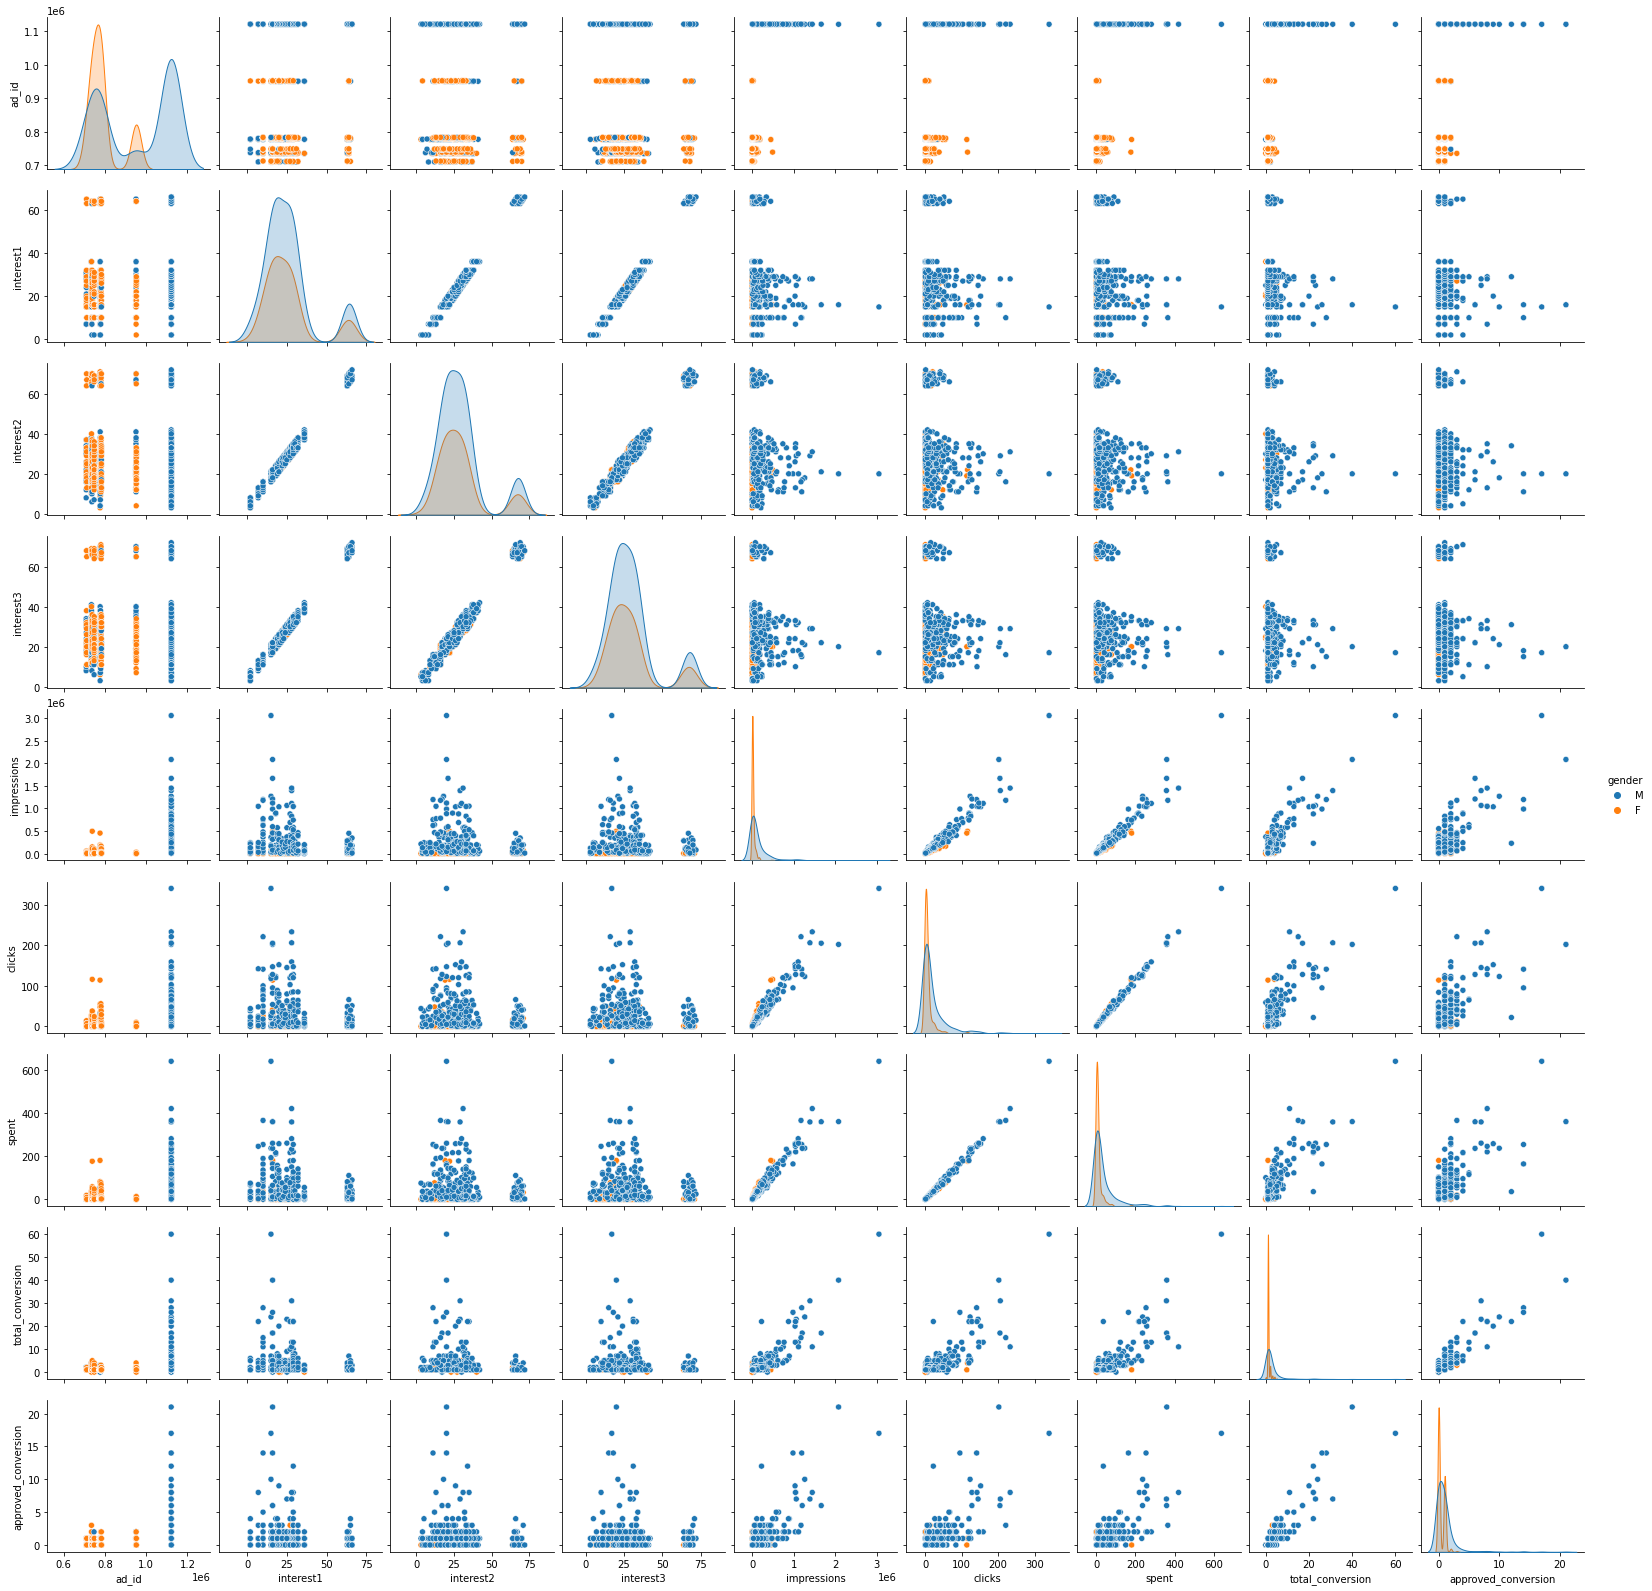

In [9]:
sb.pairplot(df,hue='gender')

Text(0.5, 1.0, 'Targetted Age in the Ad Campaign')

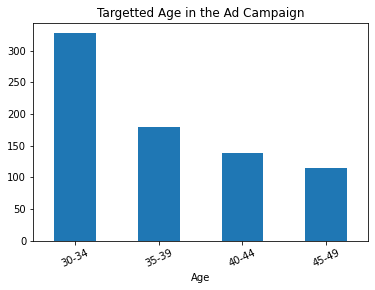

In [11]:
df.age.value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.xlabel('Age')
plt.title('Targetted Age in the Ad Campaign')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

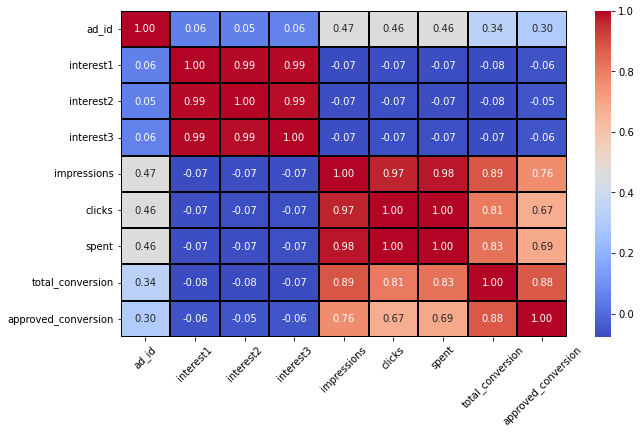

In [37]:
ax=plt.figure(figsize=(10,6))
corr=df.corr()
sb.heatmap(corr,linewidths=1,linecolor='black',annot=True, fmt=".2f", cmap="coolwarm")
plt.xticks(rotation=45)


Genders targetted for the Ad Campaign

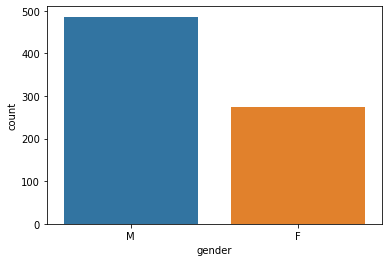

In [39]:
df.gender.value_counts()
sb.countplot(x ='gender', data = df) 
# Show the plot 
plt.show() 






Finding out who spent the maximum on Ad Campaign


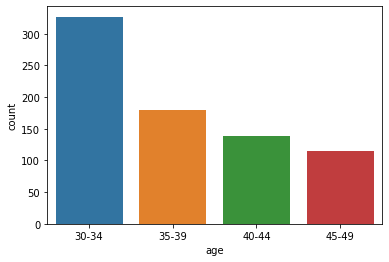

In [38]:
df[df['spent'] ==df['spent'].max()]
sb.countplot(x ='age', data = df) 
# Show the plot 
plt.show() 

Maximum number of clicks received by an ID

In [17]:
df[df['clicks'] ==df['clicks'].max()]

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
526,1121100,29/08/2017,29/08/2017,1178,144532,30-34,M,15,20,17,3052003.0,340,639.949998,60.0,17.0


Total conversions by each Id

In [18]:
tc=(df.groupby(['campaign_id'])).total_conversion.sum()
tc


campaign_id
1178    1050.0
916       58.0
936      537.0
Name: total_conversion, dtype: float64

Total Approved conversions by each Id

In [19]:
ac=(df.groupby(['campaign_id'])).approved_conversion.sum()
ac

campaign_id
1178    378.0
916      24.0
936     183.0
Name: approved_conversion, dtype: float64

Percentage of Ads approved

In [20]:
(df.groupby(['campaign_id'])).spent.sum()

campaign_id
1178    16577.159998
916       149.710001
936      2893.369999
Name: spent, dtype: float64

Total Number of impressions received

In [21]:
(df.groupby(['campaign_id'])).impressions.sum()

campaign_id
1178    69902476.0
916       482925.0
936      8128187.0
Name: impressions, dtype: float64

Total Number of clicks received

In [22]:
(df.groupby(['campaign_id'])).clicks.sum()

campaign_id
1178    9577
916      113
936     1984
Name: clicks, dtype: int64

Regression Analysis

In [23]:
X=df[['total_conversion','approved_conversion']]
y=df[['spent']]

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Set test size 30%

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Fitting of the data and predicting the values

In [32]:
lr= LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)